Name: Sai Deepika Sunkesula

# Task 1: Prediction using supervised ML

### Importing required libraries and reading dataset

In [4]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

# Read student scores from csv file.
dataset_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_scores_df = pd.read_csv(dataset_url)
student_scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualize the data and Separate dataset into training, validation sets

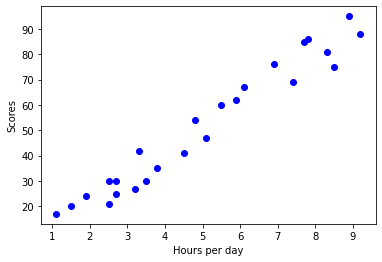

In [5]:
# Separate dataframe to input (Hours), output (Scores) columns.
X = student_scores_df["Hours"].values.reshape(-1, 1)
y = student_scores_df["Scores"].values.reshape(-1, 1)

# Visualize the data on a plot
plt.scatter(X, y, color="blue")
plt.xlabel("Hours per day")
plt.ylabel("Scores")
plt.show()

# Separate dataset into training and validation sets.
# Use a fixed random state to get deterministic results across runs.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

# Also initialize X_test, for the given test value of 9.25 hrs/day.
# We have to predict the score for this input, using fitted regression model.
X_test = np.array([9.25])

In [6]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualize the regression line along with actual data points

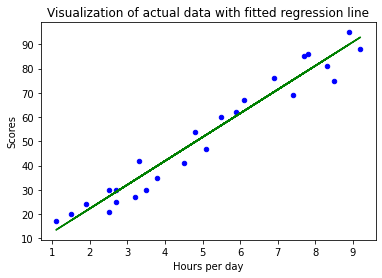

In [7]:
# Plot using coefficients obtained from gradient descent
y_predicted = regressor.predict(X)

plt.plot(X, y_predicted, color="green")
plt.scatter(X, y, color="blue", s=20)
plt.xlabel("Hours per day")
plt.ylabel("Scores")
plt.title("Visualization of actual data with fitted regression line")
plt.show()

### Compare the actual scores and predicted scores for validation set

In [8]:
# Display the predicted scores for the validation set.
y_val_predicted = regressor.predict(X_val)

table_data = np.transpose(np.array([X_val.reshape(-1), y_val.reshape(-1), y_val_predicted.reshape(-1)]))
print("Predictions for validation set using regression line:")
print(tabulate(table_data.tolist(), headers=['Hours', 'Actual Score', 'Predicted Score']))
print()

# Compute mean-absolute error for validation set.
from sklearn import metrics  
print("Mean Absolute Error for predictions on validation set:", 
      metrics.mean_absolute_error(y_val, y_val_predicted)) 

Predictions for validation set using regression line:
  Hours    Actual Score    Predicted Score
-------  --------------  -----------------
    1.5              20            17.3714
    5.1              47            52.7029
    3.3              42            35.0372
    3.2              27            34.0557
    4.5              41            46.8143

Mean Absolute Error for predictions on validation set: 5.632881746692994


### Predicting the score for given test data

In [9]:
# Predict the marks for test set.
y_test_predicted = regressor.predict(X_test.reshape(-1, 1))
print("Predicted score for ", X_test[0], " hours per day is: ", y_test_predicted[0, 0])

Predicted score for  9.25  hours per day is:  93.43229053722453
